# Normalidad y homocedasticidad

## Segmento 1
### Testeando la normalidad de varibales aleatorias
* QQPLOTS
* Histograma + función de densidad
* Tests de normalidad

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import pandas as pd

Evaluemos si la edad de los pacientes de nuestra base de datos de ACV sigue una distribución normal

In [5]:
ejercicio= pd.read_excel("data/ejercicio.xlsx")

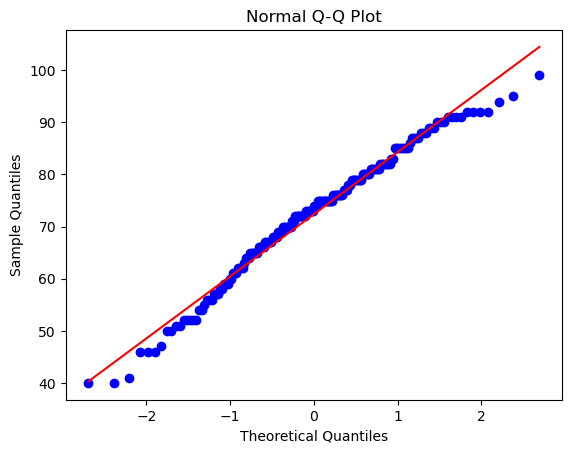

In [12]:
stats.probplot(ejercicio['Edad'], dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

No se ve muy normal que digamos... 

In [19]:
from scipy.stats import shapiro, kstest

Para poder aplicarle a nuestra variable edad un test de normalidad primero transformamos la columna en un vector (Numpy)

In [26]:
data = ejercicio['Edad']
data

0      67
1      81
2      61
3      66
4      65
       ..
190    87
191    58
192    80
193    69
194    82
Name: Edad, Length: 195, dtype: int64

In [21]:
########################
# Test de Shapiro-Wilk
########################
shapiro_test = shapiro(data)
print(f"Shapiro-Wilk test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")



Shapiro-Wilk test: W=0.9811765435238493, p-value=0.01011478164260231


De la interpretación del resultado del Test de Shapiro-Wilk, surge que debemos rechazar la hipotesis nula de normalidad
(solo tenemos un 1% de probabilidades de equivocarnos al suponer no normalidad)

In [22]:

########################
# Test de Kolmogorov-Smirnov
########################
ks_test = kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f"Kolmogorov-Smirnov test: D={ks_test.statistic}, p-value={ks_test.pvalue}")


Kolmogorov-Smirnov test: D=0.07666156162923743, p-value=0.19180194468897394


Del test de Kolmogorov - Smirnov , al contrario, surge que no podemos descartar la hipotesis nula de normalidad.
(Hay casi un 20% de probabilidades de afirmar que la muestra no es normal, y que la muestra en efecto, sea normal)

### ¿Y ahora que hacemos entonces?

Todos queremos un resultado univoco, pero muchas veces este no es el caso cuando trabajamos con numeros de la vida real.

Cuando hay un conflicto entre estas dos pruebas, tiende a considerarse que **Shapiro-Wilk** es más confiable para muestras más pequeñas, mientras que **Kolmogorov-Smirnov** puede ser más adecuado para muestras más grandes.

Como el p-value de Shapiro-Wilk es significativamente bajo, **lo más seguro es concluir que los datos no siguen una distribución normal**.

-----------------------------------------------------------------
Solo para terminar de corroborar nuestras dudas, vamos a ver si el resultado de Shapiro - Wilks se condice con el grafifico de densidad de la variable edad.

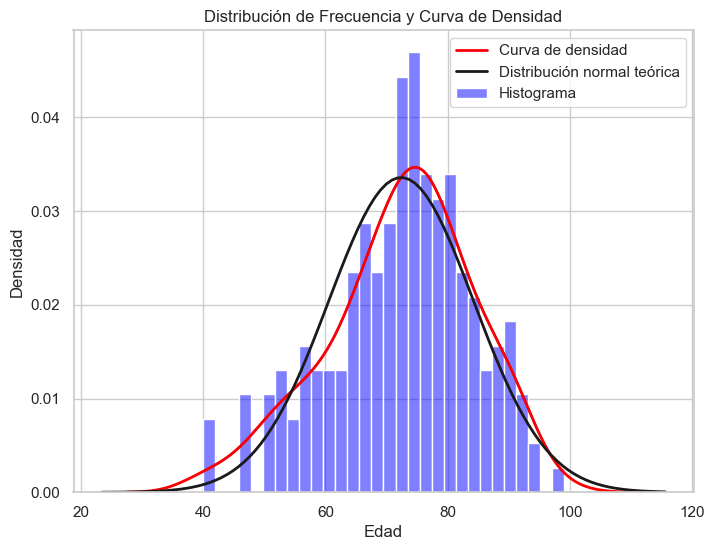

In [27]:
########################
# Plot de la distribución de frecuencia con histograma y curva de densidad
########################
plt.figure(figsize=(8,6))

# Histograma con curva de densidad
sns.histplot(data, kde=True, stat="density", color="blue", bins=30, label="Histograma")
sns.kdeplot(data, color="red", lw=2, label="Curva de densidad")

# Añadir la curva de una distribución normal teórica para comparar
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data), np.std(data))
plt.plot(x, p, 'k', lw=2, label="Distribución normal teórica")

# Personalización del gráfico
plt.title('Distribución de Frecuencia y Curva de Densidad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()

plt.show()

Concluimos que podemos rechazar la hipotesis nula de Normalidad como lo sugería Shapiro- Wilks.

al comparar nuestros datos con una ditribución normal teorica, vemos que Edad se muestra una cola mas alargada a la izquierda.

Finalmente, proponemos crear una variable artificial que siga la distribución normal para aplicarle los mismos analisis y ver que resultados obtenemos

In [28]:
# np.random.normal(media, desviación estándar, tamaño)
artificial = np.random.normal(loc=0, scale=1, size=1000)

########################
# Test de Shapiro-Wilk
########################
shapiro_test = shapiro(artificial)
print(f"Shapiro-Wilk test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

########################
# Test de Kolmogorov-Smirnov
########################
ks_test = kstest(artificial, 'norm', args=(np.mean(artificial), np.std(artificial)))
print(f"Kolmogorov-Smirnov test: D={ks_test.statistic}, p-value={ks_test.pvalue}")

Shapiro-Wilk test: W=0.9985051907133454, p-value=0.5580264044624532
Kolmogorov-Smirnov test: D=0.024786060944168353, p-value=0.5621229626867856


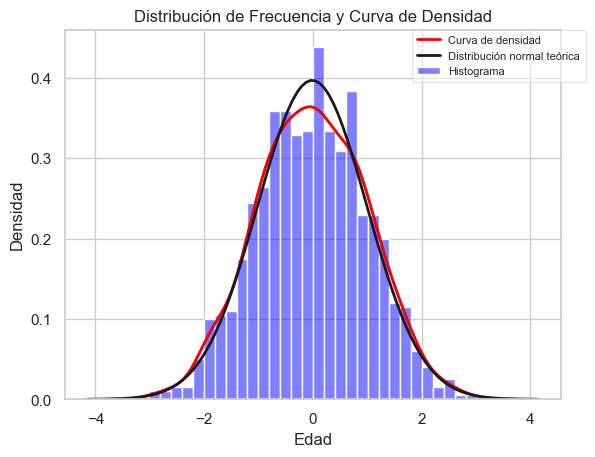

In [36]:
# Graficar un histograma de los datos artificiales y agregar una curva de densidad estimada (KDE)
sns.histplot(artificial, kde=True, stat="density", color="blue", bins=30, label="Histograma")
sns.kdeplot(artificial, color="red", lw=2, label="Curva de densidad")

# Obtener los límites actuales del eje x (para asegurarnos de que la curva teórica se ajuste al rango del histograma)
xmin, xmax = plt.xlim()

# Crear un array de valores de x dentro del rango de los datos
x = np.linspace(xmin, xmax, 100)

# Calcular la función de densidad de probabilidad (PDF) de una distribución normal teórica
p = stats.norm.pdf(x, np.mean(artificial), np.std(artificial))

# Graficar la curva de la distribución normal teórica en el mismo gráfico
plt.plot(x, p, 'k', lw=2, label="Distribución normal teórica")

# Personalización del gráfico
plt.title('Distribución de Frecuencia y Curva de Densidad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
# Ajustar la leyenda
plt.legend(fontsize=8, loc='upper right', frameon=True, fancybox=True, framealpha=0.5, 
           bbox_to_anchor=(1.05, 1), borderaxespad=0., borderpad=0.5)

# Mostrar el gráfico
plt.show()

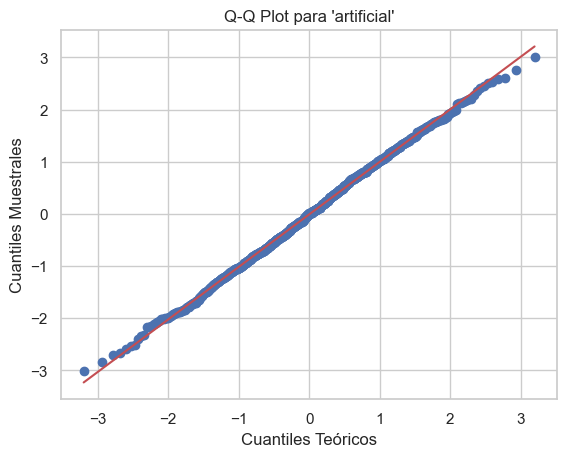

In [30]:
# Generar el Q-Q plot para la variable artificial
stats.probplot(artificial, dist="norm", plot=plt)

# Agregar título y etiquetas
plt.title("Q-Q Plot para 'artificial'")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles Muestrales")

# Mostrar el gráfico
plt.show()

Sin animo de ser reproducidas, a continuación se muestran los histogramas y curvas de densidad junto a sus QQplots para distibuciones
T de student, de Poisson e hIpergeometricas

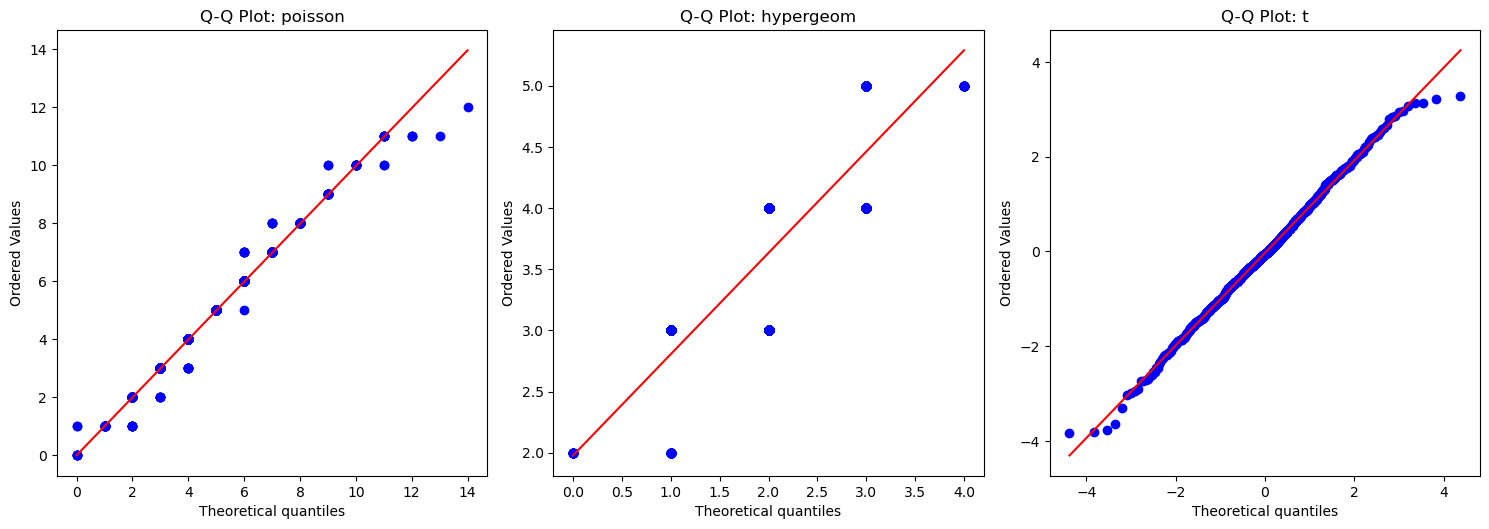

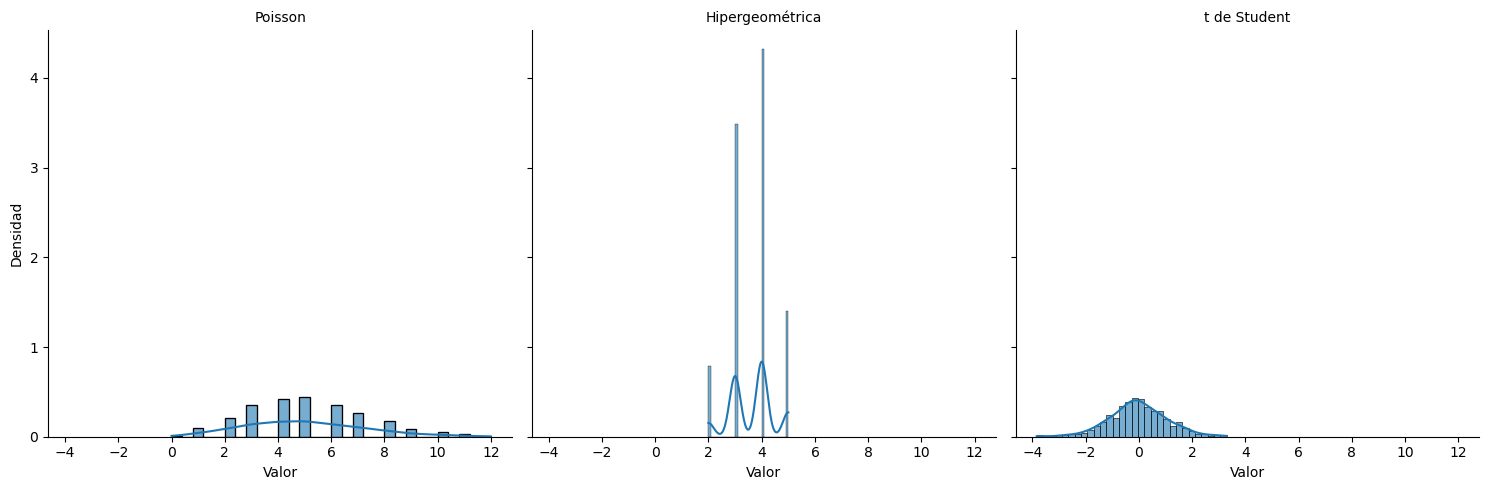

In [5]:
from matplotlib import gridspec

# Parámetros para cada distribución
np.random.seed(42)  # Para reproducibilidad

# Parámetros para distribuciones
poisson_lambda = 5
hypergeom_params = (10, 4, 5)  # (M, K, n) para la distribución hipergeométrica
t_df = 10  # grados de libertad para la distribución t de Student

# Generar datos
data_poisson = np.random.poisson(poisson_lambda, 1000)
data_hypergeom = np.random.hypergeometric(*hypergeom_params, 1000)
data_t = np.random.standard_t(t_df, 1000)

# Crear un DataFrame para usar con seaborn
import pandas as pd
df = pd.DataFrame({
    'Poisson': data_poisson,
    'Hipergeométrica': data_hypergeom,
    't de Student': data_t
})

# Crear gráfico de Q-Q para cada distribución
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1]) 

# Crear una función para los Q-Q plots
def qq_plot(data, dist, dist_params, ax):
    # Para distribuciones continuas
    if dist == 'norm':
        stats.probplot(data, dist='norm', plot=ax)
    elif dist == 't':
        stats.probplot(data, dist='t', sparams=(dist_params,), plot=ax)
    else:
        # Para distribuciones discretas
        stats.probplot(data, dist=dist, sparams=dist_params, plot=ax)
    ax.set_title(f'Q-Q Plot: {dist}')

# Q-Q plots para cada distribución
ax1 = plt.subplot(gs[0, 0])
qq_plot(data_poisson, 'poisson', (poisson_lambda,), ax1)

ax2 = plt.subplot(gs[0, 1])
qq_plot(data_hypergeom, 'hypergeom', hypergeom_params, ax2)

ax3 = plt.subplot(gs[0, 2])
qq_plot(data_t, 't', t_df, ax3)

plt.tight_layout()
plt.show()

# Crear gráficos de distribución de frecuencia y curvas de densidad facetados
df_melted = pd.melt(df.reset_index(), id_vars=['index'], var_name='Distribución', value_name='Valor')

g = sns.FacetGrid(df_melted, col='Distribución', col_wrap=3, height=5)
g.map(sns.histplot, 'Valor', kde=True, bins=30, stat="density", alpha=0.6)
g.set_titles("{col_name}")
g.set_axis_labels('Valor', 'Densidad')
g.add_legend()
plt.show()

## Segmento 2
### testeando la homocedasticidad de dos variables aletorias

In [9]:
import pingouin as pg
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot  #Haremos mas graficos qq pero con otra libreria

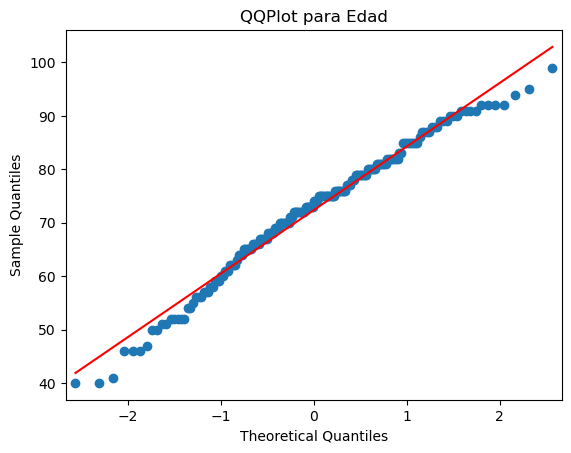

In [7]:
## volvemos a graficar el qq plot de Edad con otra libreria
# QQPlot para 'Edad'
qqplot(ejercicio['Edad'], line='s')
plt.title("QQPlot para Edad")
plt.show()

Ahora partimos la muestra por la variable Sexo y las trataremos como dos muestras independientes. veamos si podemos descartar la normalidad en ambas

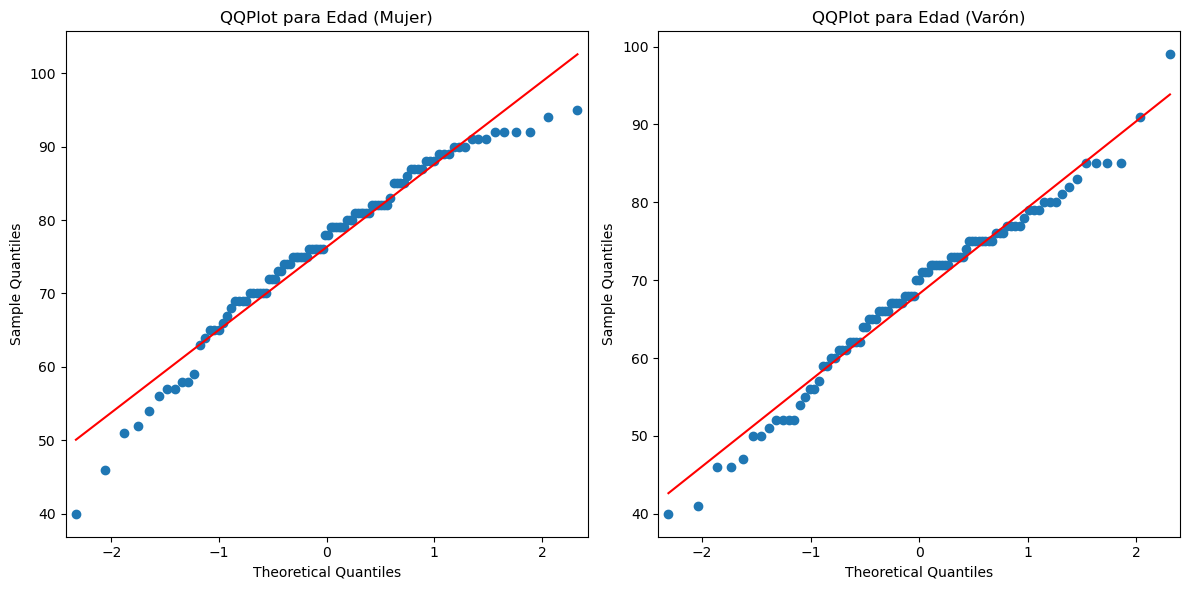

In [10]:
# Filtrar los datos por sexo
ejercicio_mujer = ejercicio[ejercicio['Sexo'] == 'F']['Edad']
ejercicio_varon = ejercicio[ejercicio['Sexo'] == 'M']['Edad']

# Crear la figura para los dos QQPlots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# QQPlot para mujeres
sm.qqplot(ejercicio_mujer, line='s', ax=axes[0])
axes[0].set_title("QQPlot para Edad (Mujer)")

# QQPlot para varones
sm.qqplot(ejercicio_varon, line='s', ax=axes[1])
axes[1].set_title("QQPlot para Edad (Varón)")

plt.tight_layout()
plt.show()

In [11]:
# Testeo de normalidad de 'Edad' por grupo de 'Sexo'
shapiro_test_sexo = ejercicio.groupby('Sexo')['Edad'].apply(stats.shapiro)
print("Shapiro-Wilk test para Edad por Sexo:")
shapiro_test_sexo

Shapiro-Wilk test para Edad por Sexo:


Sexo
F    (0.9566661708446974, 0.0023428952949255777)
M      (0.9804869340563379, 0.16841488229636603)
Name: Edad, dtype: object

**Si bien corroboramos que no podemos suponer normalidad para las mujeres a partir de nuestros datos, no podemos rechazar la hipotesis nula de normalidad para el segmento de los hombres**

#### Calculo der homocedasticidad entre 2 muestras

In [6]:
levene_test = pg.homoscedasticity(ejercicio, dv='Edad', group='Sexo', method='levene')
levene_test

,W,pval,equal_var
levene,0.00363,0.952017,True


El resultado nos idica que la varianza entre ambas muestras es significativamente similar y que podemos suponer homocedasticisdad sin problema.